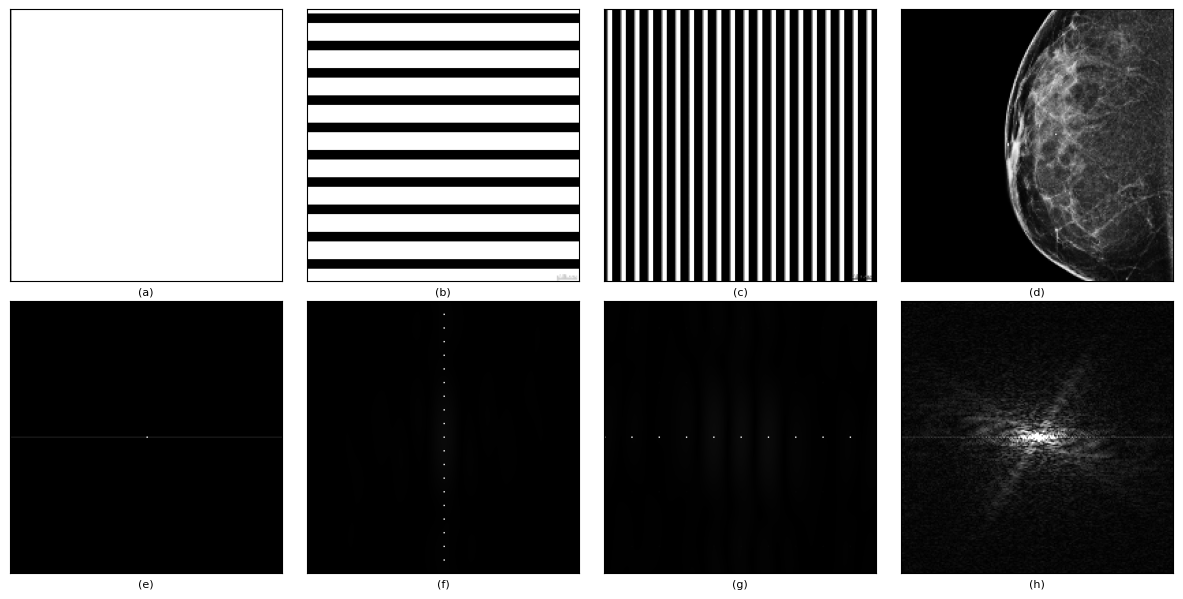

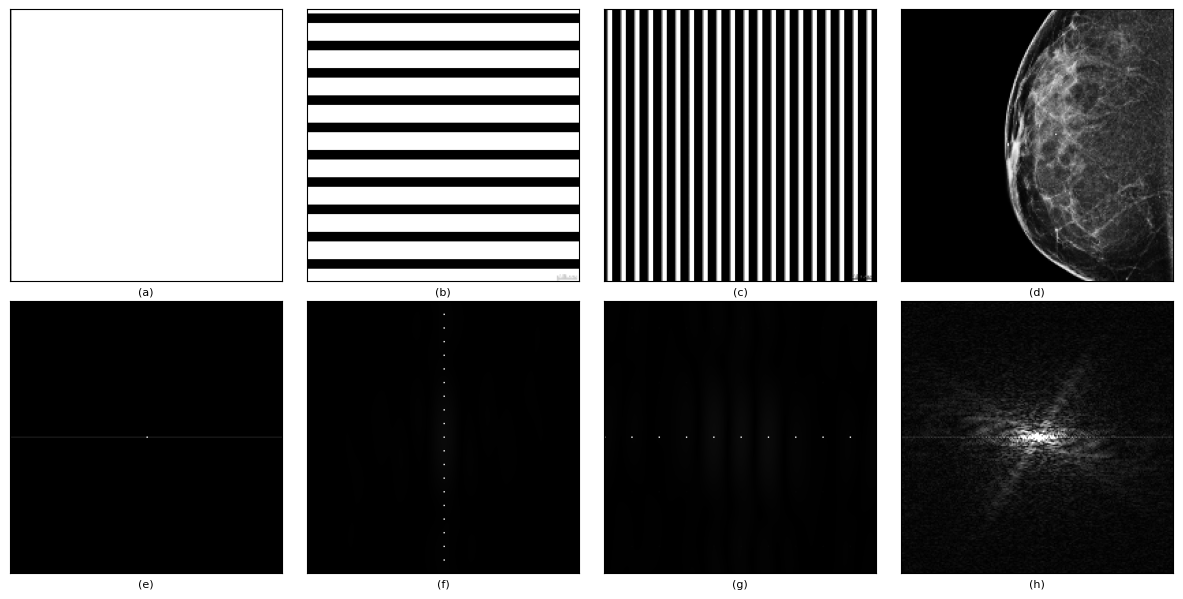

In [1]:
import os
if 'jbook' in os.getcwd():
    os.chdir(os.path.abspath(os.path.join("../../../..")))
import cv2
import matplotlib.pyplot as plt
import numpy as np
from bcd.utils.image import convert_uint8
from myst_nb import glue

FP_WHITE = "jbook/figures/frequency_white.jpg"
FP_HLINE = "jbook/figures/frequency_hline.png"
FP_VLINE = "jbook/figures/frequency_vline.png"
FP_MMG = "jbook/figures/mammogram.png"

def get_image(fp: str, size: int = 200):
    img = cv2.imread(fp, cv2.IMREAD_GRAYSCALE)
    return cv2.resize(img, (size,size))

def transform_image(img):
    # Compute fourier transformation
    img_fft = np.fft.fft2(img)
    # Shift the zero-frequency to the center
    img_shifted = np.fft.fftshift(img_fft)
    # Compute amplitude
    img_amp = np.abs(img_shifted)
    img_amp = np.clip(img_amp, a_min=0, a_max=50000)
    return img_amp


img_white = get_image(fp=FP_WHITE)
img_hline = get_image(fp=FP_HLINE)
img_vline = get_image(fp=FP_VLINE)
img_mmg = get_image(fp=FP_MMG)

img_white_fft = transform_image(img_white)
img_hline_fft = transform_image(img_hline)
img_vline_fft = transform_image(img_vline)
img_mmg_fft = transform_image(img_mmg)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12,6))
_ = axes[0,0].imshow(img_white, cmap='gray')
_ = axes[0,1].imshow(img_hline, cmap='gray')
_ = axes[0,2].imshow(img_vline, cmap='gray')
_ = axes[0,3].imshow(img_mmg, cmap='gray')

_ = axes[1,0].imshow(img_white_fft, cmap='gray')
_ = axes[1,1].imshow(img_hline_fft, cmap='gray')
_ = axes[1,2].imshow(img_vline_fft, cmap='gray')
_ = axes[1,3].imshow(img_mmg_fft, cmap='gray')

labels = np.array([["(a)", "(b)", "(c)", "(d)"], ["(e)", "(f)", "(g)", "(h)"]])
for i in range(2):
    for j in range(4):
        _ = axes[i,j].set_xlabel(labels[i,j])
        _ = axes[i,j].set_xticks([])
        _ = axes[i,j].set_yticks([])

plt.tight_layout()

glue("fft", fig)